In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from matplotlib import pyplot

In [3]:
#reading dataset file
data_csv = pd.read_csv('insurance.csv')

In [4]:
#getting the first 5 rows in the dataset
data_csv.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
#get 10 random rows from the dataset
data_csv.sample(10)

,age,sex,bmi,children,smoker,region,charges
537,46,female,30.200,2,no,southwest,8825.08600
635,64,male,38.190,0,no,northeast,14410.93210
253,27,male,30.300,3,no,southwest,4260.74400
1000,30,male,22.990,2,yes,northwest,17361.76610
1015,59,male,25.460,0,no,northwest,12124.99240
1110,54,female,32.300,1,no,northeast,11512.40500
765,57,female,31.825,0,no,northwest,11842.62375
24,37,male,28.025,2,no,northwest,6203.90175
244,63,female,27.740,0,yes,northeast,29523.16560
806,40,female,41.420,1,no,northwest,28476.73499


In [6]:
#Information about every feature int the dataset
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
#Number of rows and columns in the dataset
data_csv.shape

(1338, 7)

In [8]:
#Brief description of the numerical data in the dataset
data_csv.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
#change all region values from strings to int by deviding the column to 4 columns, 1 for each region
data_csv['region'].unique()
data_csv = pd.get_dummies(data_csv, columns=['region'])

In [10]:
data_csv.shape

(1338, 10)

In [11]:
#Convert Categorical columns to numerical
mapping_sex = {'female': 0, 'male': 1}
data_csv['sex'] = data_csv['sex'].map(mapping_sex)

mapping_smoker = {'no': 0, 'yes': 1}
data_csv['smoker'] = data_csv['smoker'].map(mapping_smoker)

In [12]:
data_csv.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [13]:
#applying features for X
X = data_csv.drop('charges', axis=1)

#applying charges for Y
Y = data_csv['charges']

In [14]:
X

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,0
2,28,1,33.000,3,0,0,0,1,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,0,1,0,0
1334,18,0,31.920,0,0,1,0,0,0
1335,18,0,36.850,0,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,0,1


In [15]:
X.shape

(1338, 9)

In [16]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

### Train

In [45]:
#split data into training and testing with 20% of it for testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [46]:
#using linear regression
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

In [47]:
print("Training_score : " , linear_model.score(x_train, y_train))

Training_score :  0.7502141083261693


In [48]:
print("Test_score : " , linear_model.score(x_test, y_test))

Test_score :  0.7492824631661967


In [31]:
predictors = x_train.columns
predictors

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [44]:
data_csv.to_csv('insurance_processed.csv', index=False)
insurance_df = pd.read_csv('insurance_processed.csv')

In [ ]:
insurance_df.sample(5)

In [ ]:
#remove missing value
insurance_df.dropna()

In [ ]:
#Corrolation between smoker and charges

fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(insurance_df['smoker'], insurance_df['charges'])

plt.xlabel('Smoker')
plt.ylabel('Charges')

In [ ]:
predictors = x_train.columns

predictors

In [33]:
#randon rows from testing data
x_test

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
1019,21,0,32.680,2,0,0,1,0,0
1188,43,0,25.270,1,1,1,0,0,0
279,51,0,21.560,1,0,0,0,1,0
125,26,0,28.785,0,0,1,0,0,0
1029,37,0,17.290,2,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
972,22,0,20.235,0,0,0,1,0,0
803,18,0,42.240,0,1,0,0,1,0
230,42,0,36.195,1,0,0,1,0,0
837,56,0,28.310,0,0,1,0,0,0


In [34]:
#Predict value for 10 random data
y_pred = linear_model.predict(x_test)

y_pred

array([ 5160.68464089, 32089.6022991 ,  8087.49345956,  4754.87229184,
        4763.09214183, 11105.86909417, 12414.06710079, 12010.6341039 ,
        2010.4480152 ,  8844.78163391,  2363.50499747,  6151.66279697,
       11663.64813396, 28965.61329748,  7524.28509369, 37727.25194595,
       11160.01230237,  7416.19565781,  3091.97671415,  8867.52812033,
       11078.91515808, 11857.20992464,  6275.72898186,  5026.63198652,
       34741.58045458, 14772.55455834, 14015.80133463,  7373.22729145,
        2978.40600236,  2691.51201269, 33697.29389695,  8698.10360729,
       12588.04801834, 32715.67189711,  6415.86081342,  7343.3830232 ,
        3522.14202573, 10519.08892286, 34671.1525167 , 12420.34462625,
       36741.47491915,  8348.43616155,  4655.94553545,  1988.67142145,
        4454.59728794, 31610.33344625, 27435.19515005,  3319.85076323,
       11478.20663119,  8357.87192434,  5472.65817568, 11986.90399493,
        2683.52504571,  9401.15251636, 13662.01797137, 10237.61095568,
      

In [35]:
#difference between the predicted value and the actual value
df_pred_actual = pd.DataFrame({'predicted': y_pred, 'actual': y_test})

df_pred_actual.head(10)

,predicted,actual
1019,5160.684641,26018.95052
1188,32089.602299,21771.34230
279,8087.493460,9855.13140
125,4754.872292,3385.39915
1029,4763.092142,6877.98010
539,11105.869094,27346.04207
26,12414.067101,14451.83515
394,12010.634104,9411.00500
182,2010.448015,4005.42250
596,8844.781634,7640.30920


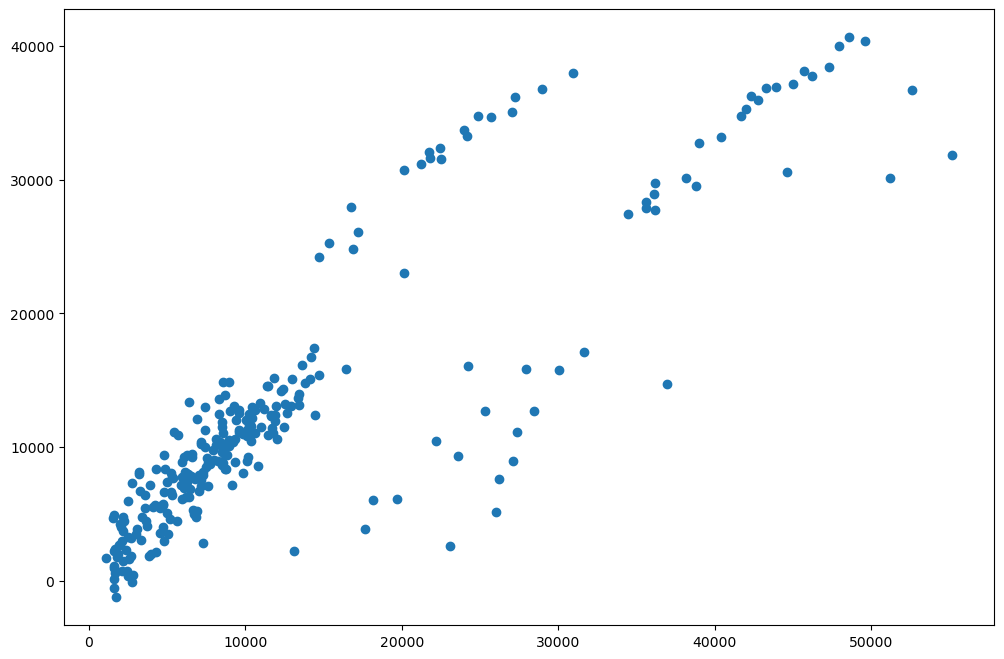

In [36]:

fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(y_test, y_pred)
plt.show()

In [37]:
#sample of the difference between predicted and actual charges
df_pred_actual_sample = df_pred_actual.sample(100)
df_pred_actual_sample

,predicted,actual
72,11421.057934,11741.72600
1046,7917.300163,7325.04820
1231,23062.337747,20167.33603
127,12793.196516,9634.53800
674,37727.251946,46200.98510
...,...,...
489,12192.800287,10461.97940
79,9456.639690,6571.02435
30,27872.344278,35585.57600
1146,36741.474919,52590.82939


In [38]:
df_pred_actual_sample = df_pred_actual_sample.reset_index()
df_pred_actual_sample

,index,predicted,actual
0,72,11421.057934,11741.72600
1,1046,7917.300163,7325.04820
2,1231,23062.337747,20167.33603
3,127,12793.196516,9634.53800
4,674,37727.251946,46200.98510
...,...,...,...
95,489,12192.800287,10461.97940
96,79,9456.639690,6571.02435
97,30,27872.344278,35585.57600
98,1146,36741.474919,52590.82939


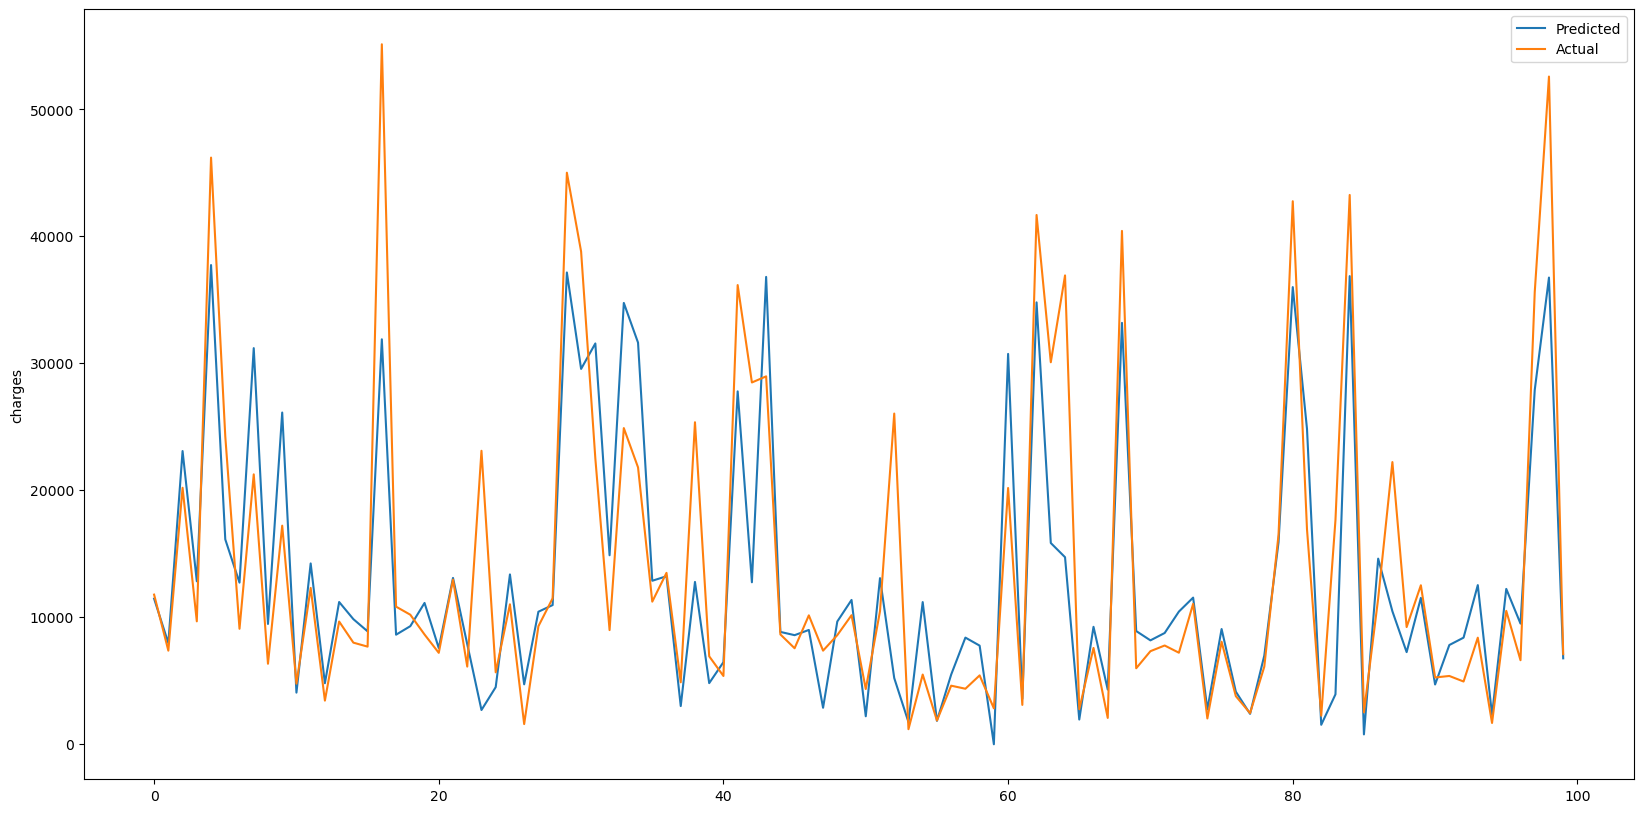

In [39]:
#Plotting the difference between the predicted and actual value
plt.figure(figsize = (20,10))

plt.plot(df_pred_actual_sample['predicted'], label='Predicted')
plt.plot(df_pred_actual_sample['actual'], label='Actual')

plt.ylabel('charges')

plt.legend()
plt.show()

In [40]:
#printing the training and testing score
print('Model score {}'.format(linear_model.score(x_test,y_test)))
print('Model score {}'.format(linear_model.score(x_train,y_train)))

Model score 0.7550800718007051
Model score 0.7493412902760377


Feature: 0, Score: 257.59557
Feature: 1, Score: -237.01069
Feature: 2, Score: 328.39319
Feature: 3, Score: 474.77419
Feature: 4, Score: 23635.13324
Feature: 5, Score: 808.12975
Feature: 6, Score: 273.28007
Feature: 7, Score: -401.27164
Feature: 8, Score: -680.13817


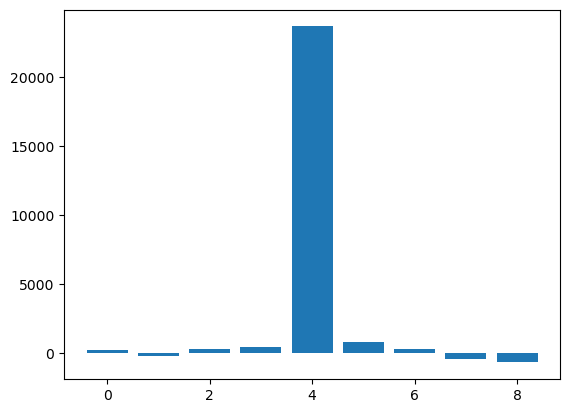

In [41]:
#showing feature importance
importance = linear_model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [42]:
#using cross validation to calculate the mean of 10 tests
kfold = KFold(n_splits=10)

scores = cross_val_score(linear_model, X, Y, cv=kfold)
mean_score = scores.mean()

print("Cross-validation score: {:.2f}".format(mean_score))

Cross-validation score: 0.74


In [43]:
# Make a prediction on a new data point
new_data = np.array([[20, 1, 30, 3, 0, 1, 0, 0, 0]])
prediction = linear_model.predict(new_data)

print("Prediction: ${:.2f}k".format(prediction[0]))

Prediction: $4795.61k


C:\Users\user\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
